# **Aviation Investment Risk: A Data-Driven Analysis of Aircraft Safety**

**BUSINESS UNDERSTANDING**

OVERVIEW

The aviation industry iss a highly regulated and risk sensitive sector where safety, reliability and operational performance are critical to business success. As organizations seek to expand into aviation related ventures, data driven insights become essential for minimizing risk and supporting startegic investment decisions.

This project utilizes historical aviation accident data provided by the National Transport Safety Board(NTSB), covering civil aviation accidents and selected incidents from 1962 to 2023. The dataset contains detailed information on aircrafts characteristics, accident cicrcumstances and injury outcomes. By analyzing this data, the project aims to identify patterns and trends relatedto aircraft safety and accident saverity over time.

Through exploratory data analysis, data cleaning, imputation and visualization, this project seeks to transform raw accident recrds into meaningful insights. These insights will support business stakeholders in evaluating aircraft risk levels and making informed decisions when entering the aviation market.

PROBLEM STATEMENT

Like many capital intensive industries, aviation presents significant operational and financial risks. Companies entering this space must carefully assess aircraft safety performance to avoid costly accidents, regulatory penalties, and reputational damage. However, organizations without prior aviation experience often struggle to evaluate risk due to the complexity and volume of historical safety data.

Key challenges faced by decision-makers include:

- Identifying aircraft with the lowest historical accident and fatality rates

- Understanding how accident severity differs across aircraft types and categories

- Evaluating trends in aviation safety over time

- Translating technical safety data into clear, actionable business insights

This project seeks to answer the following question:

“Which aircraft present the lowest operational risk based on historical accident and injury data, and how can these insights guide safe and strategic aircraft acquisition decisions?”

Addressing this problem will enable business leaders to make evidence based aircraft purchasing decisions, reduce exposure to safety risks, and establish a strong foundation for successful entry into the aviation industry.

Import libraries which will be use for computing numerical data, handling dataframes and ploting

In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading dataset into a dataframe

In [4]:
#loading the dataset
df = pd.read_csv('Data/Aviation_Data.csv')

/tmp/ipython-input-927149273.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/Aviation_Data.csv')


**DATA UNDERSTANDING**

Load up the first 5 records in dataframe

In [5]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Load up the last five records in dataframe

In [6]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


Get the shape of the dataframe

In [7]:
df.shape


(90348, 31)

Get summury information of each column in dataframe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Get descriptive statistical analysis about the dataframe

In [9]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


Get a look of all the columns in the dataframe

In [10]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

Get to see how many times a country appears in a column 'Country'

In [11]:
df['Country'].value_counts()

,count
Country,
United States,82248
Brazil,374
Canada,359
Mexico,358
United Kingdom,344
...,...
Mauritania,1
Pacific Ocean,1
Obyan,1


Check for missing values in the dataframe

In [12]:
#Cheching for missing values
df.isnull().sum()

,0
Event.Id,1459
Investigation.Type,0
Accident.Number,1459
Event.Date,1459
Location,1511
Country,1685
Latitude,55966
Longitude,55975
Airport.Code,40216
Airport.Name,37644


Check for duplicate values in the dataframe

In [13]:
#checking for duplicate values
df.duplicated().sum()

np.int64(1390)

**Data Cleaning**

Dropping Columns

Missing value

Duplicate value

Unique value

Outlier detection

Feature engineering

Drop all columns with missing values more than 35000

***Too many missing values might give error***

In [14]:
#Dropping columns
for col in df.columns:
  if df[col].isnull().sum() > 35000:
    df.drop(col, axis=1, inplace=True)

In [15]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Checking for duplicated values in column 'Event.ID'

***Column 'Event.Id' should have each value being unique***

In [16]:
df['Event.Id'].duplicated().sum()


np.int64(2396)

Checking all columns

In [17]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

Checking for null values in dataframe for cleaning purpose

In [18]:
df.isnull().sum()

,0
Event.Id,1459
Investigation.Type,0
Accident.Number,1459
Event.Date,1459
Location,1511
Country,1685
Injury.Severity,2459
Aircraft.damage,4653
Registration.Number,2841
Make,1522


Getting the count of all unique values in column 'Weather.Condition'

In [19]:
df['Weather.Condition'].value_counts()

,count
Weather.Condition,
VMC,77303
IMC,5976
UNK,856
Unk,262


Replacing all 'Unk' weather condition to 'UNK' for uniformity

In [20]:
df['Weather.Condition'] = df['Weather.Condition'].replace('Unk', 'UNK')

In [21]:
df['Weather.Condition'].value_counts()

,count
Weather.Condition,
VMC,77303
IMC,5976
UNK,1118


In [22]:
df['Broad.phase.of.flight'].value_counts()

,count
Broad.phase.of.flight,
Landing,15428
Takeoff,12493
Cruise,10269
Maneuvering,8144
Approach,6546
Climb,2034
Taxi,1958
Descent,1887
Go-around,1353


In [23]:
df['Investigation.Type'].value_counts()

,count
Investigation.Type,
Accident,85015
Incident,3874
25-09-2020,702
26-09-2020,60
02-02-2021,39
...,...
11-02-2021,1
11-12-2020,1
04-08-2021,1


Filter the dataframe to retain only rows where `Investigation.Type` is either "Accident" or "Incident".

In [24]:
df = df[df['Investigation.Type'].isin(['Accident', 'Incident'])]

In [25]:
df['Investigation.Type'].value_counts()

,count
Investigation.Type,
Accident,85015
Incident,3874


In [26]:
df['Engine.Type'].value_counts()

,count
Engine.Type,
Reciprocating,69530
Turbo Shaft,3609
Turbo Prop,3391
Turbo Fan,2481
Unknown,2051
Turbo Jet,703
Geared Turbofan,12
Electric,10
NONE,2


In [27]:
df['Report.Status'].value_counts()

,count
Report.Status,
Probable Cause,61754
Foreign,1999
<br /><br />,167
Factual,145
The pilot's failure to maintain directional control during the landing roll.,58
...,...
Water contamination in the pitch trim actuators.,1
"The pilot did not maintain directional control during takeoff at night due to his distraction with a dropped flashlight, and he delayed his decision to abort the takeoff.",1
"The pilot's failure to maintain the recommended airspeed for icing conditions and his subsequent loss of airplane control while flying the airplane under autopilot control in severe icing conditions, contrary to the airplane's handbook. Contributing to the accident was the pilot's failure to divert from an area of severe icing. Also contributing to the accident was the lack of an advisory for potential hazardous icing conditions over the destination area.",1


Drop every other row except the ones with probable cause fuctual and foreign

In [28]:
#Drop every other row except the ones with probable cause fuctual and foreign
df = df[df['Report.Status'].isin(['Probable Cause', 'Factual', 'Foreign'])]

In [29]:
df['Report.Status'].value_counts()

,count
Report.Status,
Probable Cause,61754
Foreign,1999
Factual,145


In [30]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63908,20080109X00032,Accident,NYC08FA071,2007-12-30,"CHEROKEE, AL",United States,Fatal(3),Substantial,N109AE,Bell,...,Turbo Shaft,Other Work Use,3.0,0.0,0.0,0.0,VMC,Maneuvering,Probable Cause,15-01-2009
63909,20080114X00045,Accident,LAX08FA043,2007-12-30,"PASO ROBLES, CA",United States,Fatal(1),Substantial,N254SR,Cirrus Design Corp.,...,Reciprocating,Personal,1.0,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,20-06-2014
63910,20080129X00122,Accident,CHI08CA057,2007-12-30,"ALEXANDRIA, MN",United States,Non-Fatal,Substantial,N5093F,Lerohl,...,Reciprocating,Personal,NaN,NaN,NaN,1.0,VMC,Takeoff,Probable Cause,28-02-2008
63911,20080125X00106,Accident,SEA08CA056,2007-12-31,"SANTA ANA, CA",United States,Non-Fatal,Substantial,N2800D,Piper,...,Reciprocating,Instructional,NaN,NaN,NaN,2.0,VMC,Landing,Probable Cause,28-02-2008


Drop rows in which event date and publication date is null

In [31]:
#Drop rows in which event date and publication date is null
df.dropna(subset=['Event.Date', 'Publication.Date'], inplace=True)


In [32]:
df


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,CF-TLU,Mcdonnell Douglas,...,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63908,20080109X00032,Accident,NYC08FA071,2007-12-30,"CHEROKEE, AL",United States,Fatal(3),Substantial,N109AE,Bell,...,Turbo Shaft,Other Work Use,3.0,0.0,0.0,0.0,VMC,Maneuvering,Probable Cause,15-01-2009
63909,20080114X00045,Accident,LAX08FA043,2007-12-30,"PASO ROBLES, CA",United States,Fatal(1),Substantial,N254SR,Cirrus Design Corp.,...,Reciprocating,Personal,1.0,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,20-06-2014
63910,20080129X00122,Accident,CHI08CA057,2007-12-30,"ALEXANDRIA, MN",United States,Non-Fatal,Substantial,N5093F,Lerohl,...,Reciprocating,Personal,NaN,NaN,NaN,1.0,VMC,Takeoff,Probable Cause,28-02-2008
63911,20080125X00106,Accident,SEA08CA056,2007-12-31,"SANTA ANA, CA",United States,Non-Fatal,Substantial,N2800D,Piper,...,Reciprocating,Instructional,NaN,NaN,NaN,2.0,VMC,Landing,Probable Cause,28-02-2008


Fill all numerical columns with median from each column

In [33]:
#Fill all numerical columns with median from each column
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))


In [34]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,CF-TLU,Mcdonnell Douglas,...,Turbo Fan,NaN,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63908,20080109X00032,Accident,NYC08FA071,2007-12-30,"CHEROKEE, AL",United States,Fatal(3),Substantial,N109AE,Bell,...,Turbo Shaft,Other Work Use,3.0,0.0,0.0,0.0,VMC,Maneuvering,Probable Cause,15-01-2009
63909,20080114X00045,Accident,LAX08FA043,2007-12-30,"PASO ROBLES, CA",United States,Fatal(1),Substantial,N254SR,Cirrus Design Corp.,...,Reciprocating,Personal,1.0,0.0,0.0,1.0,VMC,Maneuvering,Probable Cause,20-06-2014
63910,20080129X00122,Accident,CHI08CA057,2007-12-30,"ALEXANDRIA, MN",United States,Non-Fatal,Substantial,N5093F,Lerohl,...,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,28-02-2008
63911,20080125X00106,Accident,SEA08CA056,2007-12-31,"SANTA ANA, CA",United States,Non-Fatal,Substantial,N2800D,Piper,...,Reciprocating,Instructional,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,28-02-2008


Fill all categorical data with mode of the column

In [35]:
#Fill all categorical data with mode of the column
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))


In [36]:
df.isnull().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,0
Country,0
Injury.Severity,0
Aircraft.damage,0
Registration.Number,0
Make,0


In [37]:
df['Event.Id'].duplicated().sum()

np.int64(751)

Drop all duplicated rows in event id

In [38]:
#Drop all duplicated rows in event id
df.drop_duplicates(subset='Event.Id', inplace=True)

In [39]:
df['Event.Id'].duplicated().sum()

np.int64(0)

In [40]:
df.duplicated().sum()

np.int64(0)

Check for unique values in dataframe

In [41]:
df.nunique()

,0
Event.Id,50408
Investigation.Type,2
Accident.Number,50408
Event.Date,8285
Location,16035
Country,162
Injury.Severity,97
Aircraft.damage,3
Registration.Number,46049
Make,4066


In [42]:
df['Injury.Severity'].value_counts()


,count
Injury.Severity,
Non-Fatal,38693
Fatal(1),4980
Fatal(2),2949
Incident,1643
Fatal(3),903
...,...
Fatal(96),1
Fatal(114),1
Fatal(199),1


Checking for final shape of dataframe

In [43]:
df.shape


(50408, 23)

In [44]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,Reciprocating,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,CF-TLU,Mcdonnell Douglas,...,Turbo Fan,Personal,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017


Create new cleaned dataset

In [45]:
#Create new cleaned dataset
# df.to_csv('Cleaned_Aviation_Data.csv')

Loading new clean dataset

In [46]:
#Loading new clean dataset
cdf = pd.read_csv('Data/Cleaned_Aviation_Data.csv')

In [47]:
cdf.head()

,Unnamed: 0,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
1,2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,...,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,26-02-2007
2,3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
3,4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,...,Reciprocating,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980
4,5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,CF-TLU,...,Turbo Fan,Personal,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017


**Data analysis**

Univarient analysis

Mean( )

Mode( )

Median( )

Standard deviation(std( ))

Variance( )

skew( )

Checking for the mean for several columns

In [48]:
cdf[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].mean()

,0
Total.Fatal.Injuries,0.555507
Total.Serious.Injuries,0.218477
Total.Minor.Injuries,0.348457
Total.Uninjured,4.505079


Checking for the median for several columns

In [49]:
cdf[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].median()

,0
Total.Fatal.Injuries,0.0
Total.Serious.Injuries,0.0
Total.Minor.Injuries,0.0
Total.Uninjured,1.0


Checking for the mode for several columns

In [50]:
cdf[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].mode()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,0.0,0.0,0.0,1.0


Checking for the standard deviation for several columns

In [51]:
cdf[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].std()

,0
Total.Fatal.Injuries,5.090372
Total.Serious.Injuries,1.162368
Total.Minor.Injuries,1.795717
Total.Uninjured,24.218624


Checking for the variance for several columns

In [52]:
cdf[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].var()

,0
Total.Fatal.Injuries,25.911891
Total.Serious.Injuries,1.351100
Total.Minor.Injuries,3.224599
Total.Uninjured,586.541724


Bivarient Analysis

Covariance between Number of engines and fatal injuries

In [53]:
#Covariance between Number of engines and fatal injuries
cdf[['Number.of.Engines', 'Total.Fatal.Injuries']].cov()

,Number.of.Engines,Total.Fatal.Injuries
Number.of.Engines,0.194324,0.147940
Total.Fatal.Injuries,0.147940,25.911891


Correlation between Number of engines and fatal injuries

In [54]:
#Correlation between Number of engines and fatal injuries
cdf[['Number.of.Engines', 'Total.Fatal.Injuries']].corr()

,Number.of.Engines,Total.Fatal.Injuries
Number.of.Engines,1.000000,0.065929
Total.Fatal.Injuries,0.065929,1.000000


In [55]:
cdf[['Total.Fatal.Injuries', 'Total.Serious.Injuries']].corr()

,Total.Fatal.Injuries,Total.Serious.Injuries
Total.Fatal.Injuries,1.000000,0.185592
Total.Serious.Injuries,0.185592,1.000000


Graphs


Categorize injury suverity into two either fatal or non fatal

In [56]:
#Categorize injury suverity into two either fatal or non fatal
cdf['Injury.Severity'] = cdf['Total.Fatal.Injuries'].apply(lambda x: 'Fatal' if x > 0 else 'Non-Fatal')

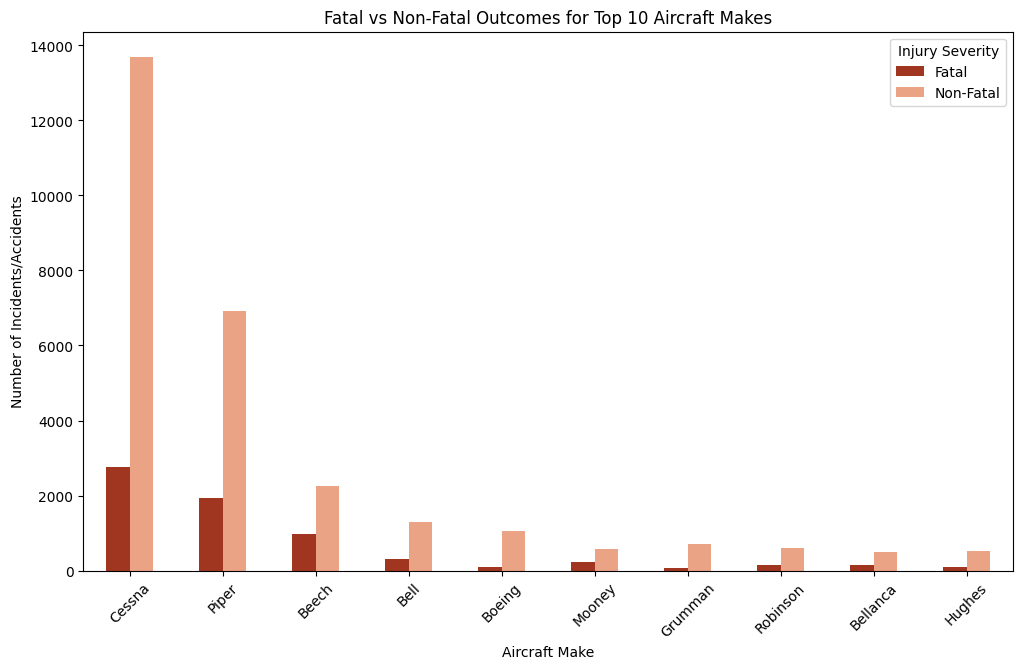

In [57]:
make_severity_counts = cdf.groupby(['Make', 'Injury.Severity']).size().unstack(fill_value=0)

# Calculate total incidents per make to find the top manufacturers
make_severity_counts['Total'] = make_severity_counts['Fatal'] + make_severity_counts['Non-Fatal']
top_10_makes = make_severity_counts.sort_values(by='Total', ascending=False).head(10)

# Drop the 'Total' column before plotting
top_10_makes = top_10_makes.drop(columns='Total')

# Plotting the grouped bar chart (NOT stacked)
fig, ax = plt.subplots(figsize=(12, 7))
top_10_makes.plot(kind='bar', stacked=False, ax=ax, color={'Fatal': '#A13620', 'Non-Fatal': '#EBA386'})
plt.title('Fatal vs Non-Fatal Outcomes for Top 10 Aircraft Makes')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Incidents/Accidents')
plt.xticks(rotation=45)
plt.legend(title='Injury Severity')
plt.show()


Key Observations

1. Across the top 10 aircraft manufacturers, non-fatal incidents significantly outnumber fatal incidents, but the ratio of fatal to non-fatal outcomes varies noticeably by manufacturer with the ratio of fatal to non fatal injuries slightly higher in Mooney.

2. Some manufacturers with high total incident counts show relatively low fatal counts, while others exhibit a higher proportion of fatal outcomes per incident, indicating differences in severity rather than frequency.

/tmp/ipython-input-164222336.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fatal_injury_rate', y=top_10_fatal_models.index, data=top_10_fatal_models, palette='YlOrBr')


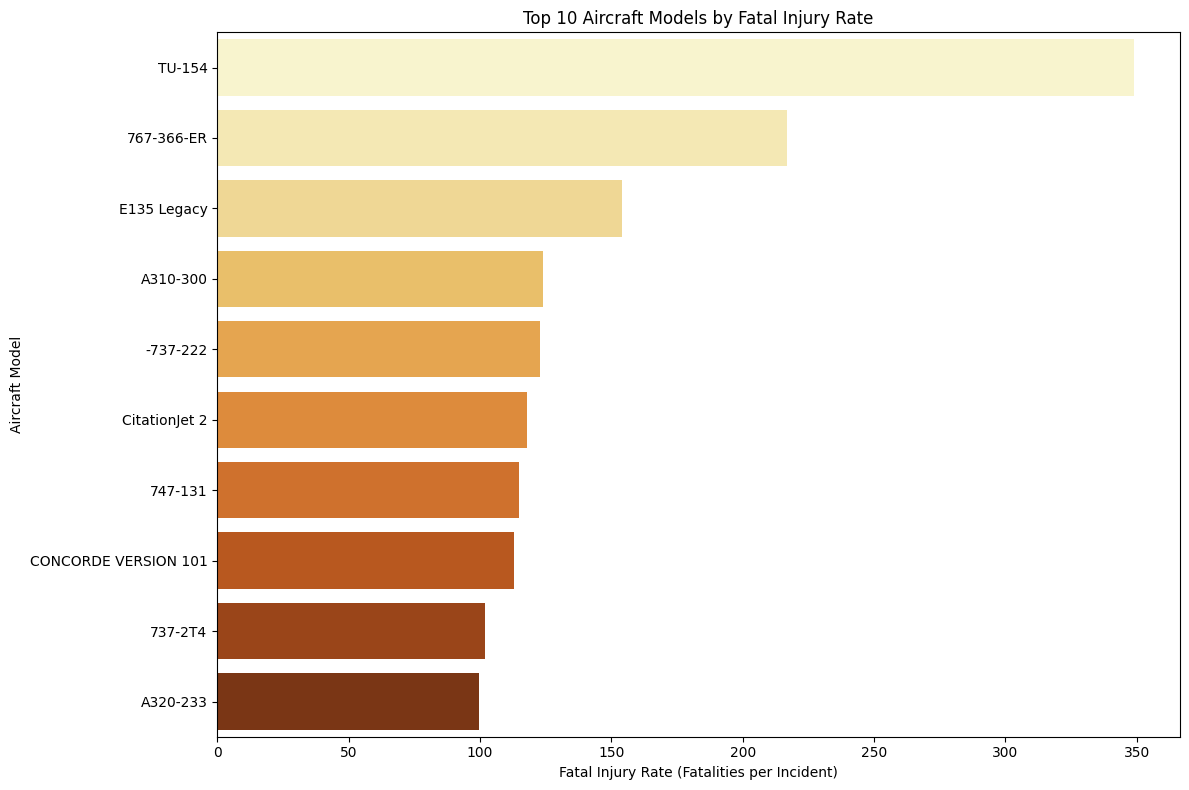

In [58]:
# Calculate total fatal injuries and total incidents per model
model_stats = cdf.groupby('Model').agg(total_fatal_injuries=('Total.Fatal.Injuries', 'sum'),total_incidents=('Event.Id', 'count'))

# Calculate fatal injury rate
model_stats['fatal_injury_rate'] = model_stats['total_fatal_injuries'] / model_stats['total_incidents']

# Sort by fatal injury rate and select top 10 models
top_10_fatal_models = model_stats.sort_values(by='fatal_injury_rate', ascending=False).head(10)

# Plotting the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='fatal_injury_rate', y=top_10_fatal_models.index, data=top_10_fatal_models, palette='YlOrBr')

plt.title('Top 10 Aircraft Models by Fatal Injury Rate')
plt.xlabel('Fatal Injury Rate (Fatalities per Incident)')
plt.ylabel('Aircraft Model')
plt.tight_layout()
plt.show()

Key Observations

1. Aircraft models vary substantially in fatal injury rate per incident, with some models like TU-154 and 767-366-ER producing far more fatalities per accident than others like 737-2T4 and A320-233.

2. High fatal injury rates occur even among models with fewer total incidents, indicating that severity, not just frequency, drives risk.

/tmp/ipython-input-1644683504.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean_fatal_injuries', y='Engine.Type', data=engine_risk_filtered, palette='YlOrBr', ax=ax)


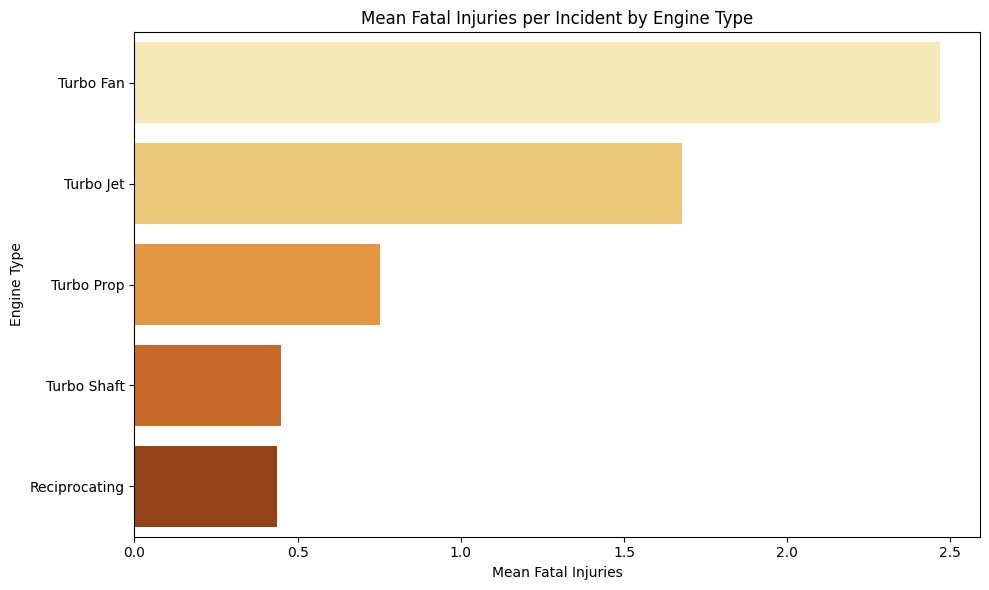


Accident Count by Engine Type:
               accident_count
Engine.Type                  
Turbo Fan                1373
Turbo Jet                 444
Turbo Prop               1935
Turbo Shaft              2103
Reciprocating           43027


In [59]:
engine_risk = cdf.groupby('Engine.Type').agg(mean_fatal_injuries=('Total.Fatal.Injuries', 'mean'),accident_count=('Event.Id', 'count')).reset_index()

# Filter for relevant engine types
relevant_engine_types = ['Reciprocating', 'Turbo Shaft', 'Turbo Prop', 'Turbo Fan', 'Turbo Jet']
engine_risk_filtered = engine_risk[engine_risk['Engine.Type'].isin(relevant_engine_types)]

# Sort by mean fatal injuries for better visualization
engine_risk_filtered = engine_risk_filtered.sort_values(by='mean_fatal_injuries', ascending=False)

# Create the bar chart for mean fatal injuries
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='mean_fatal_injuries', y='Engine.Type', data=engine_risk_filtered, palette='YlOrBr', ax=ax)

plt.title('Mean Fatal Injuries per Incident by Engine Type')
plt.xlabel('Mean Fatal Injuries')
plt.ylabel('Engine Type')
plt.tight_layout()
plt.show()

print("\nAccident Count by Engine Type:")
print(engine_risk_filtered[['Engine.Type', 'accident_count']].set_index('Engine.Type'))

Key Observations

1. Certain engine types like Turbo Fan show higher average fatal injuries per incident, meaning accidents involving these engines tend to be more severe.

2. Other engine types like Reciprocating engines demonstrate lower mean fatalities, even when they appear frequently in the dataset.

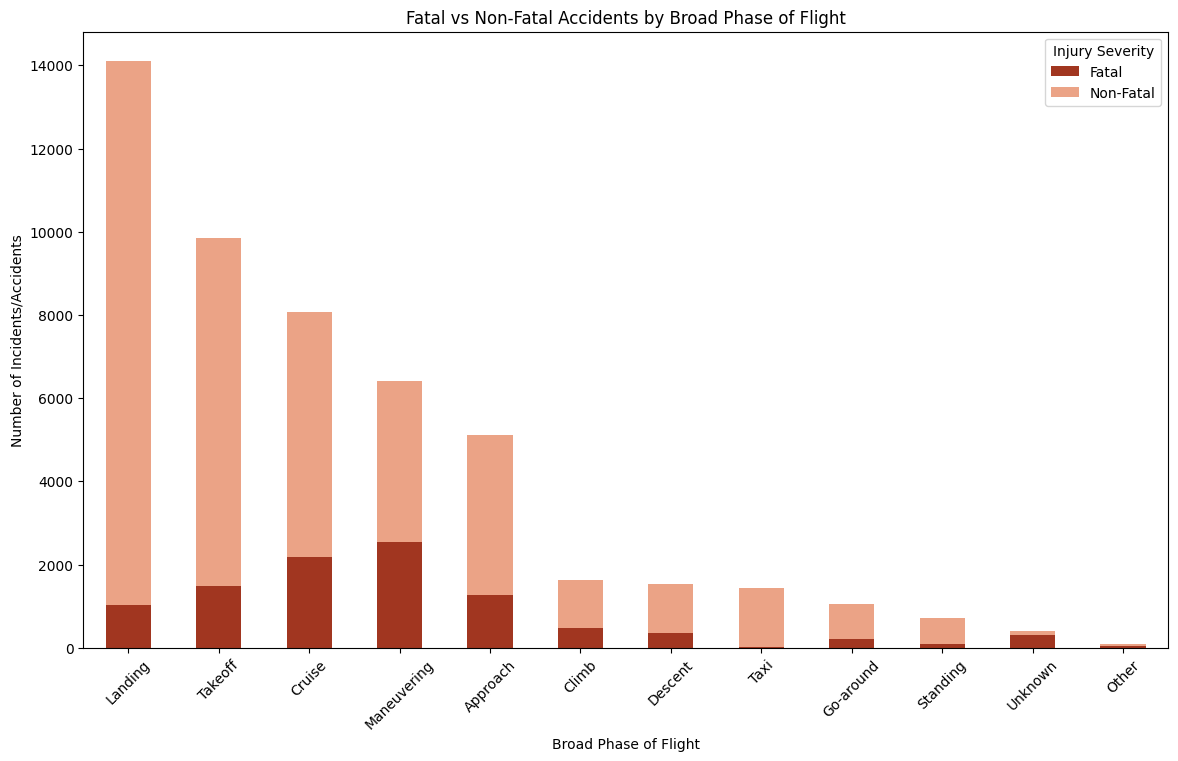

In [60]:
# Group by Broad.phase.of.flight and Injury.Severity, then unstack
flight_phase_severity = cdf.groupby(['Broad.phase.of.flight', 'Injury.Severity']).size().unstack(fill_value=0)

# Sort by total incidents in each phase for better visualization (optional)
flight_phase_severity['Total'] = flight_phase_severity['Fatal'] + flight_phase_severity['Non-Fatal']
flight_phase_severity = flight_phase_severity.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))
flight_phase_severity.plot(kind='bar', stacked=True, ax=ax, color={'Fatal': '#A13620', 'Non-Fatal': '#EBA386'})

plt.title('Fatal vs Non-Fatal Accidents by Broad Phase of Flight')
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Number of Incidents/Accidents')
plt.xticks(rotation=45)
plt.legend(title='Injury Severity')
plt.show()

Key Observations

1. A small number of flight phases account for the majority of both total and fatal accidents.

2. Some phases like Maneuvering and Cruise phase show a higher proportion of fatal outcomes, indicating elevated risk when accidents occur during those phases.

/tmp/ipython-input-3517705889.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weather.Condition', y='fatality_rate', data=weather_risk_stats, palette=['#A13620', '#EBA386'], ax=ax)


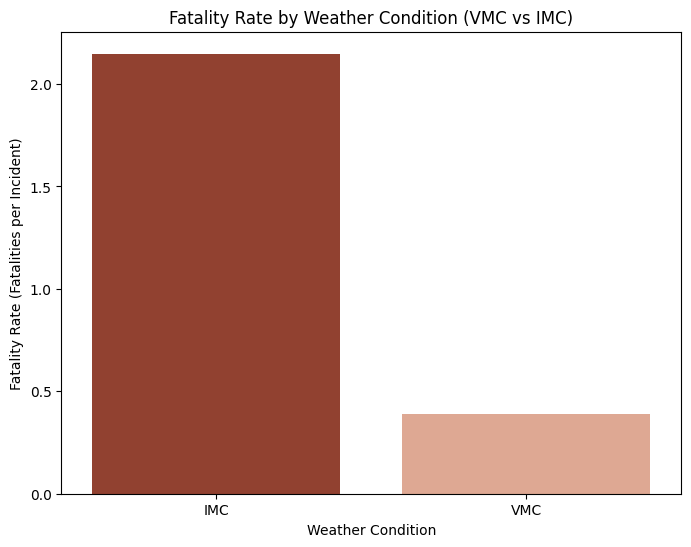

In [61]:
# Filter data for VMC and IMC weather conditions
weather_risk = cdf[cdf['Weather.Condition'].isin(['VMC', 'IMC'])].copy()

# Group by Weather.Condition and calculate total fatal injuries and total incidents
weather_risk_stats = weather_risk.groupby('Weather.Condition').agg(total_fatal_injuries=('Total.Fatal.Injuries', 'sum'),total_incidents=('Event.Id', 'count')).reset_index()

# Calculate fatality rate
weather_risk_stats['fatality_rate'] = weather_risk_stats['total_fatal_injuries'] / weather_risk_stats['total_incidents']

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Weather.Condition', y='fatality_rate', data=weather_risk_stats, palette=['#A13620', '#EBA386'], ax=ax)

plt.title('Fatality Rate by Weather Condition (VMC vs IMC)')
plt.xlabel('Weather Condition')
plt.ylabel('Fatality Rate (Fatalities per Incident)')
plt.show()

Key Observations

1. IMC accidents have a significantly higher fatality rate per incident than VMC accidents.

2. While VMC accidents occur more frequently, they result in fewer fatalities per event, indicating lower severity.

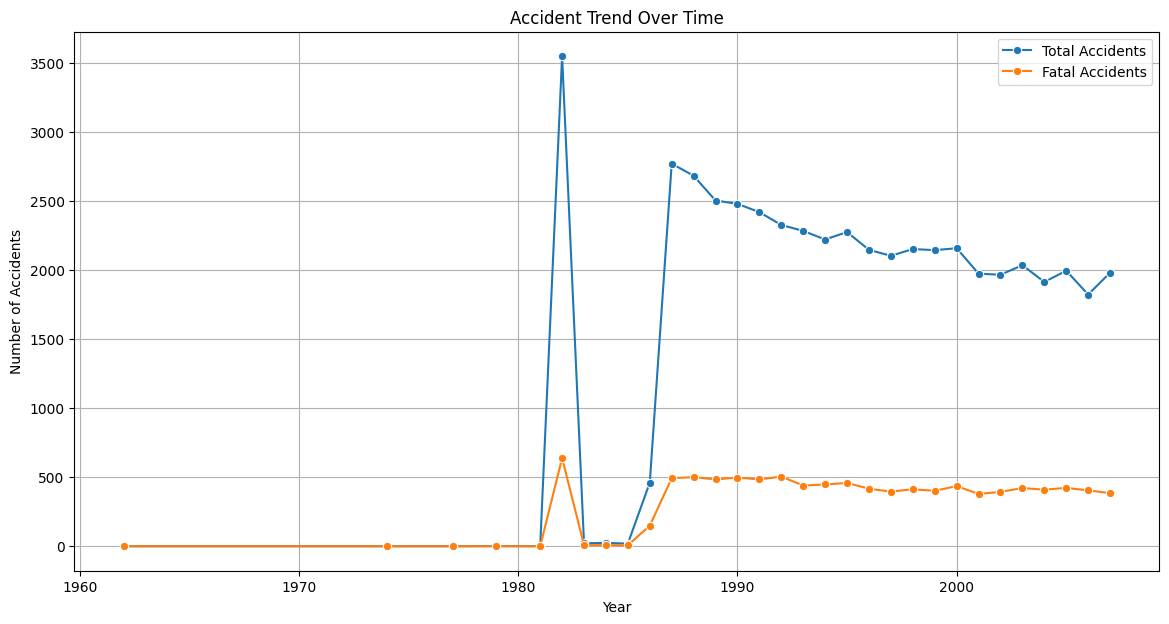

In [62]:
cdf['Event.Date'] = pd.to_datetime(cdf['Event.Date'])
cdf['Year'] = cdf['Event.Date'].dt.year

# Calculate total accidents per year
accidents_per_year = cdf.groupby('Year').size().reset_index(name='Total Accidents')

# Calculate fatal accidents per year
fatal_accidents_per_year = cdf[cdf['Total.Fatal.Injuries'] > 0].groupby('Year').size().reset_index(name='Fatal Accidents')

# Merge the two dataframes
trend_data = pd.merge(accidents_per_year, fatal_accidents_per_year, on='Year', how='left').fillna(0)

# Plotting the trend over time
fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(x='Year', y='Total Accidents', data=trend_data, marker='o', label='Total Accidents', ax=ax)
sns.lineplot(x='Year', y='Fatal Accidents', data=trend_data, marker='o', label='Fatal Accidents', ax=ax)

plt.title('Accident Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.legend()
plt.show()

Key Observations

1. Total accidents have declined over time, suggesting improvements in aviation safety overall.

2. Fatal accidents have also declined, but not proportionally every year, meaning severe accidents still occur.

**Conclusion**

Visual 1: Fatal vs Non-Fatal Outcomes for Top 10 Aircraft Makes

- Aircraft manufacturer is associated not only with how often incidents occur, but with how severe those incidents tend to be. Manufacturers with lower fatal-to-non-fatal ratios present lower operational and financial risk, even if they appear frequently in accident data.

Visual 2: Top 10 Aircraft Models by Fatal Injury Rate

- Aircraft model choice has a direct and measurable impact on accident severity, making fatal injury rate a more relevant risk metric than raw accident counts.

Visual 3: Mean Fatal Injuries per Incident by Engine Type

- Engine type influences accident severity, not just aircraft performance, and should be treated as a core safety consideration in acquisition decisions

Visual 4: Fatal vs Non-Fatal Accidents by Broad Phase of Flight

- Accident risk is not evenly distributed across flight operations specific phases represent concentrated points of failure.

Visual 5: Fatality Rate by Weather Condition (VMC vs IMC)

- Weather conditions strongly affect accident severity, with IMC operations posing outsized fatality risk.

Visual 6: Accident Trends Over Time

- Despite overall safety improvements, high severity accidents remain a business risk, reinforcing the need for careful aircraft and operational choices.

**Recommendations**

1. Purchase aircraft from manufacturers and models with low fatal injury rates per accident, not simply low accident counts.

2. Prioritize aircrafts with strong IMC-capable systems.

3. Reduce early stage exposure by limiting IMC operations and emphasizing training during high risk flight phases.

4. Prioritize aircraft with lower risk engine types that demonstrate lower mean fatal injuries per incident, especially for early stage fleet expansion.

5. Focus pilot training, standard operating procedures, and safety monitoring on high risk flight phases, particularly approach, landing and maneuvering.
